In [118]:
#!/usr/bin/env pyhon
from __future__ import print_function
from itertools import count
import numpy as np
import torch
import torch.autograd
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as Data

from sklearn.datasets import load_iris
from torch.autograd import Variable
from torch.optim import SGD

In [119]:
torch.manual_seed(1)
LR=0.01
BATCH_SIZE=20
EPOCH=10

In [120]:
x=torch.unsqueeze(torch.linspace(-1,1,1500),dim=1)
#z1=torch.linspace(-1,1,15)
#z2=torch.unsqueeze(torch.linspace(-1,1,15),dim=1)
#print(z1.shape)
#print(z2.shape)
#print(z1)
#print(z2)
z=x.size()
print(z)
y=x.pow(3)+0.1*torch.normal(torch.zeros(*x.size()))
print(*x.size())
print(torch.zeros(*x.size()))
print(torch.normal(torch.zeros(*x.size())))
print(torch.normal(torch.zeros(*x.size())).size())

torch.Size([1500, 1])
1500 1
tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])
tensor([[-0.8773],
        [ 1.3240],
        [-1.1222],
        ...,
        [ 0.4691],
        [ 1.2000],
        [-0.8294]])
torch.Size([1500, 1])


<class 'torch.Tensor'>
<class 'torch.Tensor'>
[[-1.        ]
 [-0.99866575]
 [-0.99733156]
 ...
 [ 0.9973316 ]
 [ 0.9986658 ]
 [ 1.        ]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


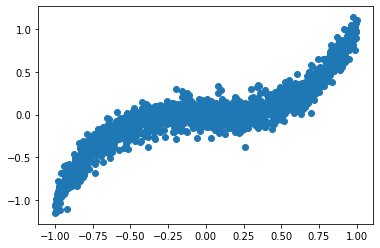

In [121]:
plt.scatter(x.numpy(),y.numpy())
print(type(x))
print(type(y))
print(x.numpy())
print(type(x.numpy()))
print(type(y.numpy()))
print(type(torch.linspace(-1,1,1500)))
plt.show()

In [127]:
#torch_dataset=Data.TensorDataset(data_sensor=x,target_tensor=y)旧版
torch_dataset=Data.TensorDataset(x,y)#新版
loader = Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)
print(type(loader))
print(loader)

<class 'torch.utils.data.dataloader.DataLoader'>


In [123]:
class Net (torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden= torch.nn.Linear(1,20)
        self.predict=torch.nn.Linear(20,1)
        
    def forward(self,x):
        
        x=F.relu(self.hidden(x))
        #print('%s is: %s' %('x',str(type(self.hidden(x)))))
        #print(x.size())
        x=self.predict(x)
        #print(x.size())
        return x


In [124]:
net_SGD=Net()
net_Momentum=Net()
net_RMSprop=Net()
net_AdaGrad=Net()
net_Adam=Net()

nets=[net_SGD,net_Momentum,net_AdaGrad,net_RMSprop,net_Adam]

opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_AdaGrad=torch.optim.Adagrad(net_AdaGrad.parameters(),lr=LR)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers=[opt_SGD,opt_Momentum,opt_AdaGrad,opt_RMSprop,opt_Adam]

loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[],[]]
#x_train = np.linspace(0, 50, num=30) #从0-50生成num多个点
#print(type(x_train))
#print(x_train.size)
#print(x_train.shape)
#y_train = 5 * x_train + np.sin(x_train) * x_train + np.random.normal(0, scale=1, size=x_train.size) # y = 5*x + x*sin(x) + noise
#print(y_train.size)
#print(y_train.shape)
#x_train = torch.Tensor(x_train)#转化为张量
#y_train = torch.Tensor(y_train)
#print(x_train.size())
#print(x_train.shape)
#print(y_train.size())
#print(y_train.shape)

EPOCH:  0
EPOCH:  1
EPOCH:  2
EPOCH:  3
EPOCH:  4
EPOCH:  5
EPOCH:  6
EPOCH:  7
EPOCH:  8
EPOCH:  9


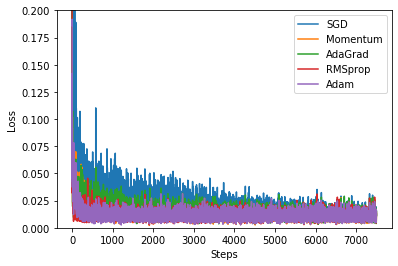

In [137]:
for epoch in range(EPOCH):
    print('EPOCH: ', epoch)
    for step, (batch_x,batch_y) in enumerate(loader):
        b_x=Variable(batch_x)
        b_y=Variable(batch_y)
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            #if net == net_SGD:
            #    print('net_SGD')
            #elif net == net_Momentum:
            #    print('net_Momentum')
            #elif net == net_AdaGrad:
            #    print('net_AdaGrad')
            #elif net == net_RMSprop:
            #    print('net_RMSprop')
            #elif net == net_Adam:
            #    print('net_Adam')
            output=net(b_x)
            #pdb.set_trace()
            loss=loss_func(output,b_y)
            #if opt == opt_SGD:
            #    print('opt_SGD')
            #elif opt == opt_Momentum:
            #    print('opt_Momentum')
            #elif opt == opt_AdaGrad:
            #    print('opt_AdaGrad')
            #elif opt == opt_RMSprop:
            #    print('opt_RMSprop')
            #elif opt == opt_Adam:
            #    print('opt_Adam')
            opt.zero_grad()
            loss.backward()
            opt.step()
            #l_his.append(loss.data[0])
            l_his.append(loss.item())
        #print(type(zip(nets,optimizers,losses_his)))
labels = ['SGD','Momentum','AdaGrad','RMSprop','Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()